In [ ]:
# -- Bendras kasmėnesinis pardavimų skaičius? (lentelė: SalesOrderHeader)
# -- Mėnesiniai pardavimai pagal šalį (SalesOrderHeader, SalesTerritory, CountryRegion)
# -- Kurios parduotuvės pasirodo geriausiai? (SalesOrderHeader, Store)
# -- Palyginkite Online versus Store pagal Sales count ir Revenue: (SalesOrderHeader, , jei OnlineOrderFlag = 1,
# -- tai čia Online užsakymas.
# -- atsakykite į klausimą, ar verta uždaryti/plėsti/nekeisti fizinių parduotuvių skaičiaus 
# -- eiti į Online, neiti į online?
# -- Pagrįskite.

# -- -- Koks vidutinis vieno užsakymo dydis kiekvienoje šalyje? 
# -- (SalesOrderHeader,SalesOrderDetail, SalesTerritory, CountryRegion) 

In [1]:
import sqlite3
import pandas as pd

# Connect to the database file
db_path = r"C:\Users\Batia\Desktop\AdventureWorks2022.db"
conn = sqlite3.connect(db_path)

# Query the SalesOrderHeader table to fetch the data
query = "SELECT * FROM `Sales/SalesOrderHeader`;"
sales_data = pd.read_sql_query(query, conn)

# Display the first few rows of the dataframe to understand its structure
sales_data.head()

,index,SalesOrderID,RevisionNumber,OrderDate,DueDate,ShipDate,Status,OnlineOrderFlag,SalesOrderNumber,PurchaseOrderNumber,...,CreditCardID,CreditCardApprovalCode,CurrencyRateID,SubTotal,TaxAmt,Freight,TotalDue,Comment,rowguid,ModifiedDate
0,0,43659,8,2011-05-31 00:00:00.000,2011-06-12 00:00:00.000,2011-06-07 00:00:00.000,5,0,SO43659,PO522145787,...,16281.0,105041Vi84182,NaN,20565.6206,1971.5149,616.0984,23153.2339,None,79B65321-39CA-4115-9CBA-8FE0903E12E6,2011-06-07 00:00:00.000
1,1,43660,8,2011-05-31 00:00:00.000,2011-06-12 00:00:00.000,2011-06-07 00:00:00.000,5,0,SO43660,PO18850127500,...,5618.0,115213Vi29411,NaN,1294.2529,124.2483,38.8276,1457.3288,None,738DC42D-D03B-48A1-9822-F95A67EA7389,2011-06-07 00:00:00.000
2,2,43661,8,2011-05-31 00:00:00.000,2011-06-12 00:00:00.000,2011-06-07 00:00:00.000,5,0,SO43661,PO18473189620,...,1346.0,85274Vi6854,4.0,32726.4786,3153.7696,985.5530,36865.8012,None,D91B9131-18A4-4A11-BC3A-90B6F53E9D74,2011-06-07 00:00:00.000
3,3,43662,8,2011-05-31 00:00:00.000,2011-06-12 00:00:00.000,2011-06-07 00:00:00.000,5,0,SO43662,PO18444174044,...,10456.0,125295Vi53935,4.0,28832.5289,2775.1646,867.2389,32474.9324,None,4A1ECFC0-CC3A-4740-B028-1C50BB48711C,2011-06-07 00:00:00.000
4,4,43663,8,2011-05-31 00:00:00.000,2011-06-12 00:00:00.000,2011-06-07 00:00:00.000,5,0,SO43663,PO18009186470,...,4322.0,45303Vi22691,NaN,419.4589,40.2681,12.5838,472.3108,None,9B1E7A40-6AE0-4AD3-811C-A64951857C4B,2011-06-07 00:00:00.000


In [2]:
# Convert OrderDate to datetime
sales_data['OrderDate'] = pd.to_datetime(sales_data['OrderDate'])

# Group by year and month and calculate the total sales
monthly_sales = sales_data.groupby(sales_data['OrderDate'].dt.to_period('M'))['TotalDue'].sum()


monthly_sales_df = monthly_sales.reset_index()
monthly_sales_df.columns = ['Month', 'TotalSales']




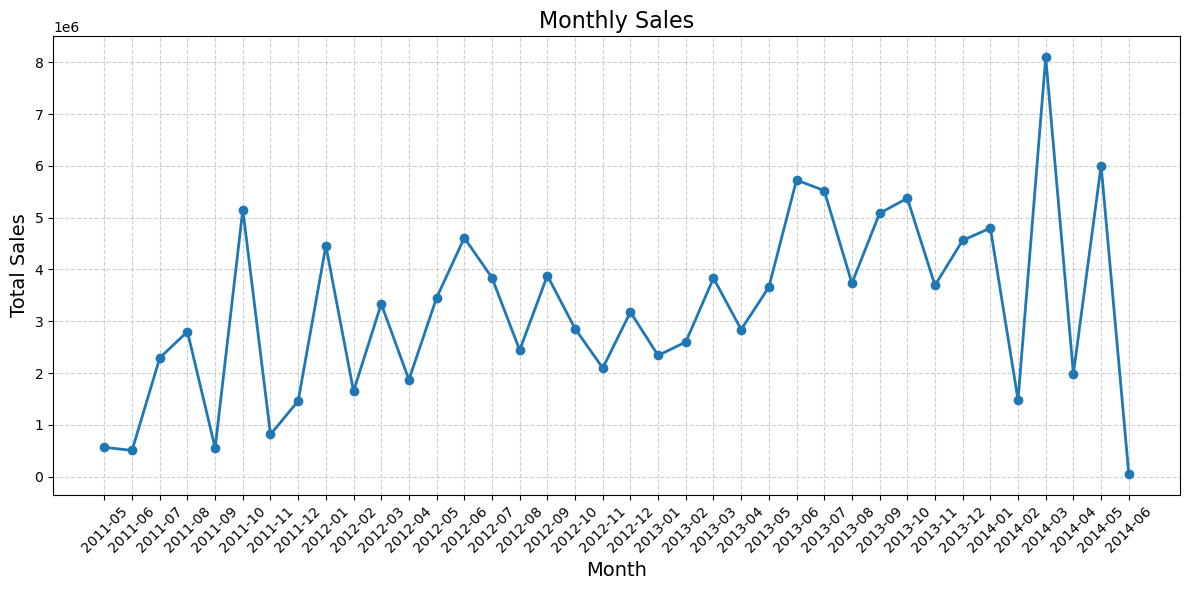

In [4]:
import matplotlib.pyplot as plt


monthly_sales_df['Month'] = monthly_sales_df['Month'].astype(str)


plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_df['Month'], monthly_sales_df['TotalSales'], marker='o', linestyle='-', linewidth=2)
plt.title('Monthly Sales', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

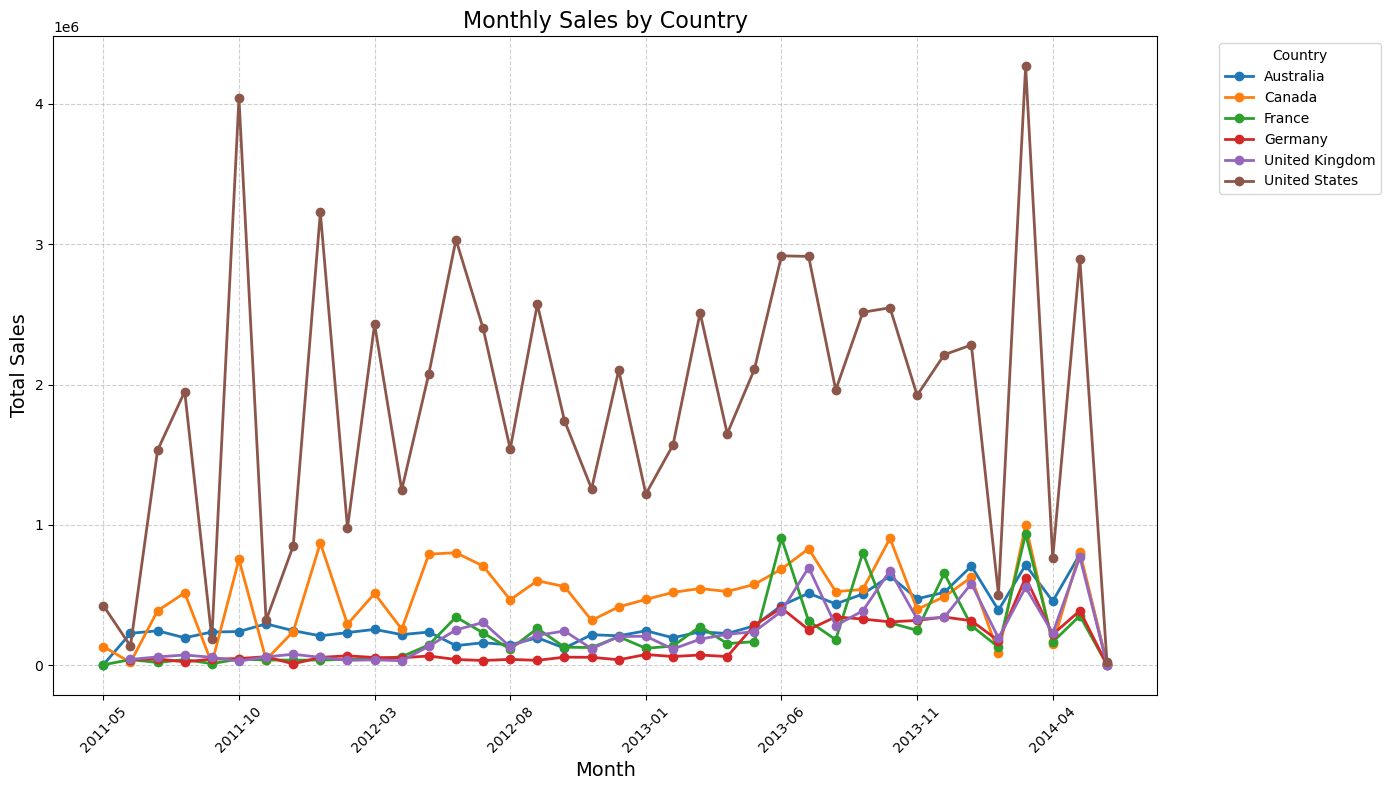

In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


db_path = r"C:\Users\Batia\Desktop\AdventureWorks2022.db"
conn = sqlite3.connect(db_path)


query_monthly_sales_country = """
SELECT 
    strftime('%Y-%m', soh.OrderDate) AS Month,
    cr.Name AS Country,
    SUM(soh.TotalDue) AS TotalSales
FROM `Sales/SalesOrderHeader` soh
JOIN `Sales/SalesTerritory` st ON soh.TerritoryID = st.TerritoryID
JOIN `Person/CountryRegion` cr ON st.CountryRegionCode = cr.CountryRegionCode
GROUP BY Month, Country
ORDER BY Month, TotalSales DESC;
"""


monthly_sales_country_df = pd.read_sql_query(query_monthly_sales_country, conn)

# Pivot the data for visualization
pivot_df = monthly_sales_country_df.pivot(index='Month', columns='Country', values='TotalSales')


pivot_df.plot(kind='line', figsize=(14, 8), marker='o', linewidth=2)

plt.title('Monthly Sales by Country', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


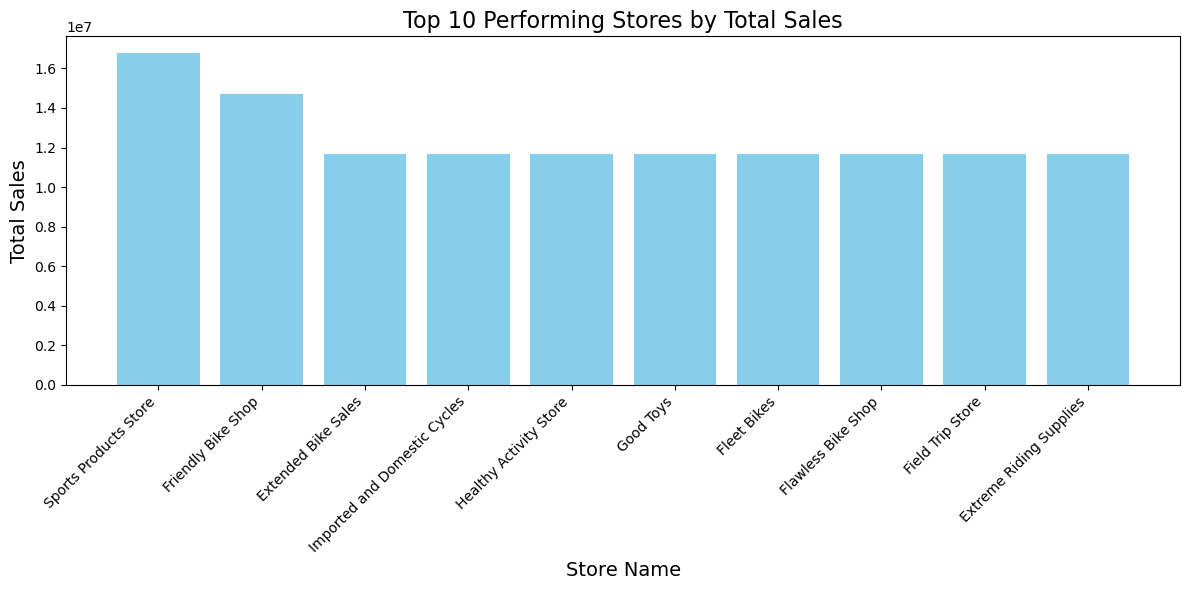

In [9]:
query_sales = """
SELECT 
    s.Name AS StoreName,
    SUM(soh.TotalDue) AS TotalSales
FROM `Sales/SalesOrderHeader` soh
JOIN `Sales/Store` s ON soh.SalesPersonID = s.SalesPersonID
GROUP BY StoreName
ORDER BY TotalSales DESC;
"""


sales_by_store = pd.read_sql_query(query_sales, conn)


top_stores = sales_by_store.sort_values('TotalSales', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_stores['StoreName'], top_stores['TotalSales'], color='skyblue')
plt.title('Top 10 Performing Stores by Total Sales', fontsize=16)
plt.xlabel('Store Name', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


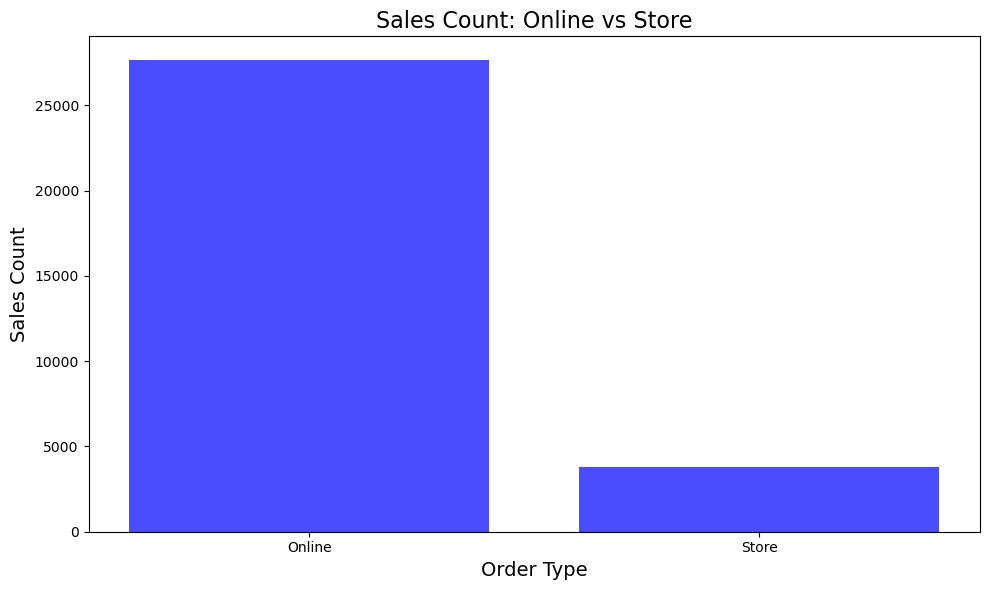

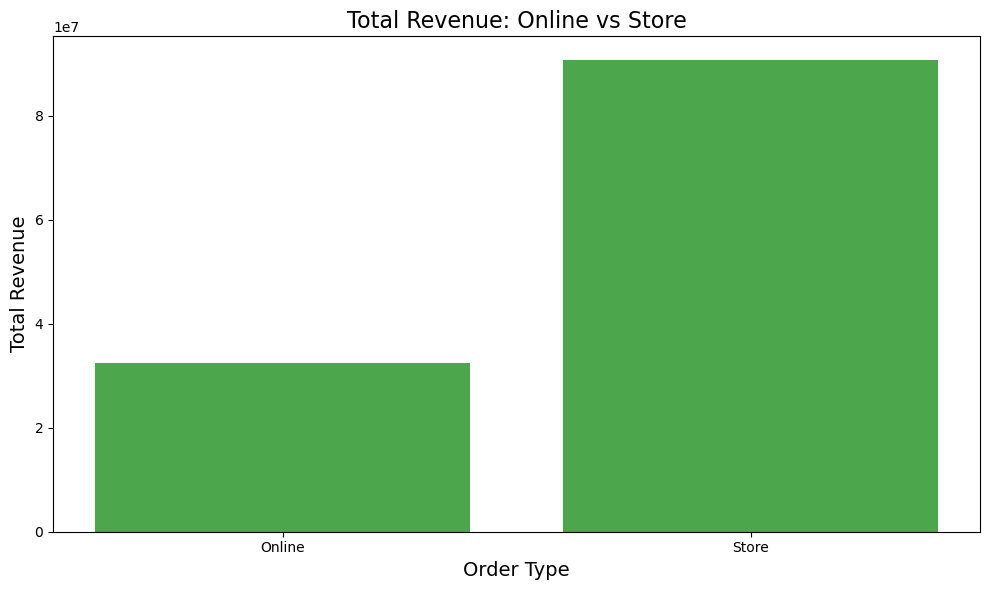

In [10]:
query_online_vs_store = """
SELECT 
    CASE 
        WHEN OnlineOrderFlag = 1 THEN 'Online'
        ELSE 'Store'
    END AS OrderType,
    COUNT(*) AS SalesCount,
    SUM(TotalDue) AS TotalRevenue
FROM `Sales/SalesOrderHeader`
GROUP BY OrderType;
"""

online_vs_store_df = pd.read_sql_query(query_online_vs_store, conn)


plt.figure(figsize=(10, 6))
plt.bar(online_vs_store_df['OrderType'], online_vs_store_df['SalesCount'], color='blue', alpha=0.7)
plt.title('Sales Count: Online vs Store', fontsize=16)
plt.xlabel('Order Type', fontsize=14)
plt.ylabel('Sales Count', fontsize=14)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(online_vs_store_df['OrderType'], online_vs_store_df['TotalRevenue'], color='green', alpha=0.7)
plt.title('Total Revenue: Online vs Store', fontsize=16)
plt.xlabel('Order Type', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.tight_layout()
plt.show()
